In [2]:
import sys,os
import numpy as np
import pylab as plt

In [8]:
columns = [ \
"ObjectId"             , #  0
"IdBundesland"         , #  1
"Bundesland"           , #  2
"Landkreis"            , #  3
"Altersgruppe"         , #  4
"Geschlecht"           , #  5
"AnzahlFall"           , #  6
"AnzahlTodesfall"      , #  7
"Meldedatum"           , #  8
"IdLandkreis"          , #  9
"Datenstand"           , # 10
"NeuerFall"            , # 11
"NeuerTodesfall"       , # 12
"Refdatum"             , # 13
"NeuGenesen"           , # 15
"AnzahlGenesen"        , # 16
"IstErkrankungsbeginn" , # 17
"Altersgruppe2"        , # 18
]
sep= ";"

# https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0
with open("RKI_COVID19.csv", 'r') as ein:
    lines = ein.read().splitlines()[1:]

cases = 0
deaths = 0

fall = np.zeros((5, 31))
dall = np.zeros((5, 31))

month = [31, 29, 31, 30, 31]

for i,line in enumerate(lines):
    cols = line.split(";")

    case  = int(cols[6])
    death = int(cols[7])

    cases  = cases  + case
    deaths = deaths + death

    y,m,d = tuple(cols[8].split()[0].split("-"))
    m = int(m)-1
    d = int(d)-1

    fall[m,d] = fall[m,d] + case
    dall[m,d] = dall[m,d] + death

print(cases, deaths)

f = []
d = []
for i in range(5):
    f = f + list(fall[i,:])
    d = d + list(dall[i,:])

f = np.array(f)
d = np.array(d)
n0 = 31+29
n = len(f) - n0
data = np.zeros((n-31, 2))
data[:,0] = f[n0:-31]
data[:,1] = d[n0:-31]

np.save("rki.npy", data)

import rki_daten

157565 6110


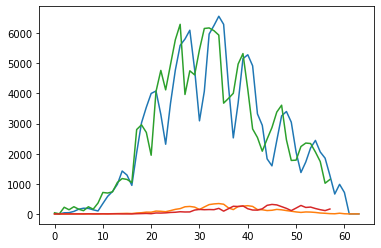

In [9]:
plt.plot(data[:,0])
plt.plot(data[:,1])
plt.plot(rki_daten.data[:,0])
plt.plot(rki_daten.data[:,1])
